## RoBERTa Model <a class="anchor"  id="chapter8"></a> 

### Building RoBERTa Model Architecture  <a class="anchor"  id="section_8_1"></a>

In the BERT model, I added some additional layers on top of the pre-trained model to improve its performance for the text classification task. RoBERTa's classification model already comes with a more robust classification head containing two fully connected linear layers, so I will not be adding any additional layers below.

In [22]:
# Set device to use GPU in case it isn't already
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

max_length = 50

def create_roberta():
    # Load the BERT model for sequence classification
    model = RobertaForSequenceClassification.from_pretrained('roberta-base', 
                                                      num_labels=2, 
                                                      output_attentions=False,
                                                      output_hidden_states=False, 
                                                      force_download=True)
    
    # Move the model to the desired device (e.g. GPU)
    device = torch.device('cuda' if torch.cuda.is_available() else "cpu")
    model.to(device)
    
    return model

model = create_roberta()

# Visualize model architecture 
batch_size = 16

# Define an example input size that matches your input data
input_data = torch.zeros(batch_size, max_length).long()

# Print the summary of the model architecture
summary(model, input_data=input_data, device='cuda')

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Layer (type:depth-idx)                                       Output Shape              Param #
RobertaForSequenceClassification                             [16, 2]                   --
├─RobertaModel: 1-1                                          [16, 50, 768]             --
│    └─RobertaEmbeddings: 2-1                                [16, 50, 768]             --
│    │    └─Embedding: 3-1                                   [16, 50, 768]             38,603,520
│    │    └─Embedding: 3-2                                   [16, 50, 768]             768
│    │    └─Embedding: 3-3                                   [16, 50, 768]             394,752
│    │    └─LayerNorm: 3-4                                   [16, 50, 768]             1,536
│    │    └─Dropout: 3-5                                     [16, 50, 768]             --
│    └─RobertaEncoder: 2-2                                   [16, 50, 768]             --
│    │    └─ModuleList: 3-6                                  --               

### Training and Validation  <a class="anchor"  id="section_8_2"></a>

6090 training samples
1523 validation samples


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Epoch 1 - Avg Train Loss: 0.4715 | Avg Val Loss: 0.3787
  Accuracy: 0.84
  F1 Score: 0.78
  Precision: 0.85
  Recall: 0.73
Epoch 2 - Avg Train Loss: 0.3578 | Avg Val Loss: 0.3857
  Accuracy: 0.84
  F1 Score: 0.78
  Precision: 0.81
  Recall: 0.78
Epoch 3 - Avg Train Loss: 0.3102 | Avg Val Loss: 0.3836
  Accuracy: 0.84
  F1 Score: 0.76
  Precision: 0.87
  Recall: 0.70
No improvement in validation loss for 2 epochs. Stopping early.


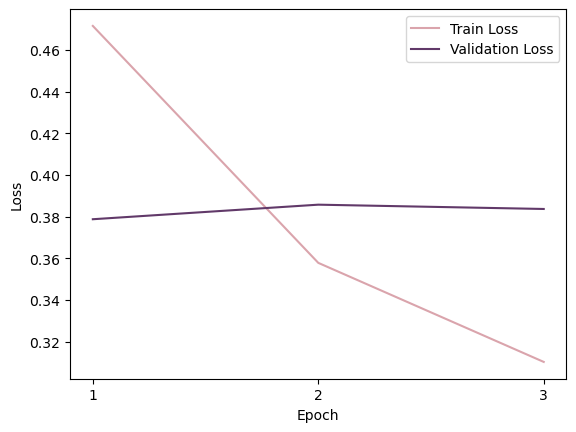

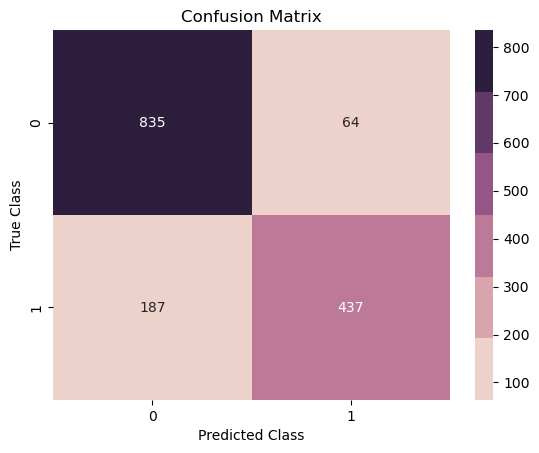

In [23]:
text_col = 'text'
target_col = 'target'
train_dataset, val_dataset, tokenizer = preprocess_train_data(train_cleaned, text_col, target_col, 
                                                model_name='roberta-base', tokenizer='ROBERTA')

train_validate_test('roberta-base', train_dataset, val_dataset, validation=True)

6090 training samples
1523 validation samples


Some weights of the model checkpoint at roberta-base were not used when initializing RobertaForSequenceClassification: ['lm_head.decoder.weight', 'roberta.pooler.dense.weight', 'lm_head.layer_norm.weight', 'lm_head.dense.bias', 'roberta.pooler.dense.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.

Epoch 1 - Avg Train Loss: 0.4673 | Avg Val Loss: 0.4018
  Accuracy: 0.83
  F1 Score: 0.78
  Precision: 0.86
  Recall: 0.74
Epoch 2 - Avg Train Loss: 0.3631 | Avg Val Loss: 0.3912
  Accuracy: 0.84
  F1 Score: 0.79
  Precision: 0.87
  Recall: 0.75
Epoch 3 - Avg Train Loss: 0.3120 | Avg Val Loss: 0.4221
  Accuracy: 0.83
  F1 Score: 0.79
  Precision: 0.82
  Recall: 0.78
Epoch 4 - Avg Train Loss: 0.2612 | Avg Val Loss: 0.4713
  Accuracy: 0.83
  F1 Score: 0.77
  Precision: 0.87
  Recall: 0.72
No improvement in validation loss for 2 epochs. Stopping early.


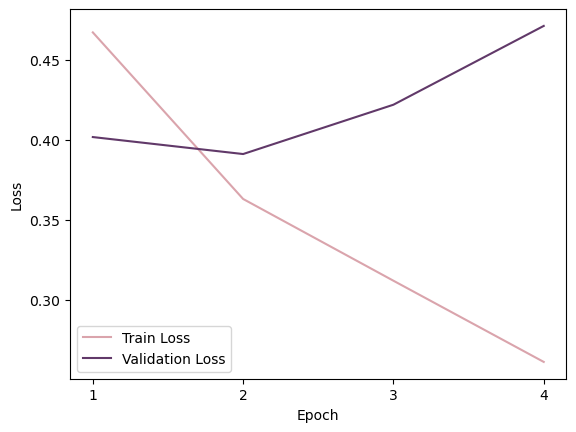

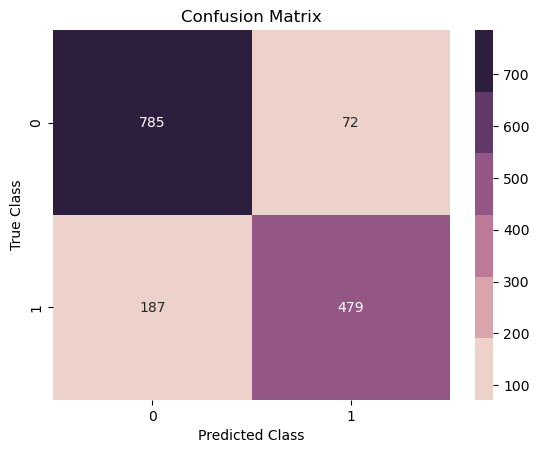

In [24]:
text_col = 'text_cleaned'
target_col = 'target'
train_dataset, val_dataset, tokenizer = preprocess_train_data(train_cleaned, text_col, target_col, 
                                                model_name='roberta-base', tokenizer='ROBERTA')

train_validate_test('roberta-base', train_dataset, val_dataset, validation=True)